To copy this template: File -> Save a Copy in Drive

***DISCLAIMER**: In case of any discrepancy in the assignment instruction, please refer to the `PDF` document.*

# Problem 3 - Weight Initialization, Dead Neurons, Leaky ReLU

## 3.1

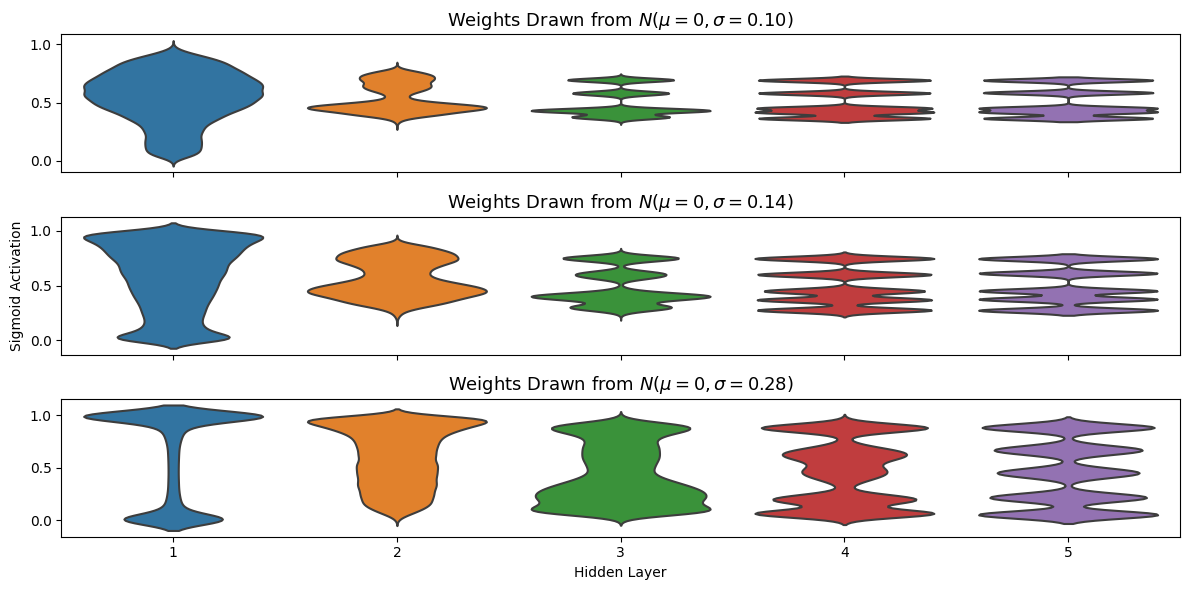

In [22]:
import keras
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from keras import initializers
from keras.datasets import mnist
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten
from keras import backend as K

from matplotlib import pyplot as plt
from matplotlib import rcParamsDefault

seed = 10

# Number of points to plot
n_train = 1000
n_test = 100
n_classes = 10

# Network params
n_hidden_layers = 5
dim_layer = 100
batch_size = n_train
epochs = 1

# Load and prepare MNIST dataset.
n_train = 60000
n_test = 10000

(x_train, y_train), (x_test, y_test) = mnist.load_data()
num_classes = len(np.unique(y_test))
data_dim = 28 * 28[]

x_train = x_train.reshape(60000, 784).astype('float32')[:n_train]
x_test = x_test.reshape(10000, 784).astype('float32')[:n_train]
x_train /= 255
x_test /= 255

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# Run the data through a few MLP models and save the activations from
# each layer into a Pandas DataFrame.
rows = []
sigmas = [0.10, 0.14, 0.28]
for stddev in sigmas:
    init = initializers.RandomNormal(mean=0.0, stddev=stddev, seed=seed)
    activation = 'sigmoid'
    input_shape = (data_dim,)
    bias_initializer  = 'zeros'
    kernel_initializer = init

    model = Sequential()
    model.add(Dense(dim_layer, input_shape=input_shape, kernel_initializer=kernel_initializer,
                    bias_initializer=bias_initializer))
    for i in range(n_hidden_layers):
        model.add(Dense(dim_layer, activation=activation, kernel_initializer=kernel_initializer,
                        bias_initializer=bias_initializer))
    model.add(Dense(n_classes, activation='softmax', kernel_initializer=kernel_initializer,
                    bias_initializer=bias_initializer))

    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=keras.optimizers.RMSprop(),
                  metrics=['accuracy'])


    outputs = [layer.output for layer in model.layers]
    activations = K.function([model.input], outputs)
    output_elts = activations([x_test])


    n_layers = len(model.layers)
    i_output_layer = n_layers - 1

    for i, out in enumerate(output_elts[:-1]):
        if i > 0 and i != i_output_layer:
            for out_i in out.ravel()[::20]:
                rows.append([i, stddev, out_i])

df = pd.DataFrame(rows, columns=['Hidden Layer', 'Standard Deviation', 'Output'])

# Plot previously saved activations from the 5 hidden layers
# using different initialization schemes.

fig = plt.figure(figsize=(12, 6))

n_rows = int(len(sigmas) / 1 + int(len(sigmas) % 1 > 0))

if not fig:
    default_figsize = rcParamsDefault['figure.figsize']
    fig = plt.figure(figsize=(
        default_figsize[0] * 1,
        default_figsize[1] * n_rows
    ))

axes = [plt.subplot(n_rows,1, i+1) for i in range(len(sigmas))]

for i, sig in enumerate(sigmas):
    ax = axes[i]
    ddf = df[df['Standard Deviation'] == sig]
    sns.violinplot(x='Hidden Layer', y='Output', data=ddf, ax=ax, scale='count', inner=None)

    ax.set_xlabel('')
    ax.set_ylabel('')

    ax.set_title('Weights Drawn from $N(\mu = 0, \sigma = {%.2f})$' % sig, fontsize=13)

    if sig == sigmas[1]:
        ax.set_ylabel("Sigmoid Activation")
    if sig != sigmas[-1]:
        ax.set_xticklabels(())
    else:
        ax.set_xlabel("Hidden Layer")

plt.tight_layout()
plt.show()

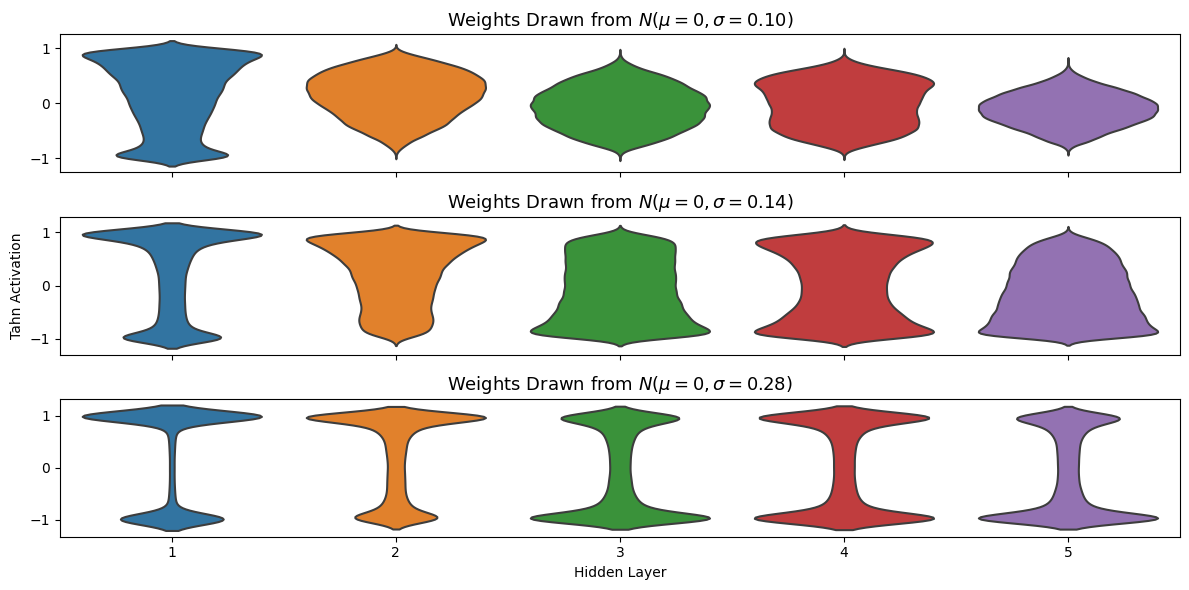

In [16]:
import keras
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from keras import initializers
from keras.datasets import mnist
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten
from keras import backend as K

from matplotlib import pyplot as plt
from matplotlib import rcParamsDefault

seed = 10

# Number of points to plot
n_train = 1000
n_test = 100
n_classes = 10

# Network params
n_hidden_layers = 5
dim_layer = 100
batch_size = n_train
epochs = 1

# Load and prepare MNIST dataset.
n_train = 60000
n_test = 10000

(x_train, y_train), (x_test, y_test) = mnist.load_data()
num_classes = len(np.unique(y_test))
data_dim = 28 * 28

x_train = x_train.reshape(60000, 784).astype('float32')[:n_train]
x_test = x_test.reshape(10000, 784).astype('float32')[:n_train]
x_train /= 255
x_test /= 255

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# Run the data through a few MLP models and save the activations from
# each layer into a Pandas DataFrame.
rows = []
sigmas = [0.10, 0.14, 0.28]
for stddev in sigmas:
    init = initializers.RandomNormal(mean=0.0, stddev=stddev, seed=seed)
    activation = 'tanh'
    input_shape = (data_dim,)
    bias_initializer  = 'zeros'
    kernel_initializer = init

    model = Sequential()
    model.add(Dense(dim_layer, input_shape=input_shape, kernel_initializer=kernel_initializer,
                    bias_initializer=bias_initializer))
    for i in range(n_hidden_layers):
        model.add(Dense(dim_layer, activation=activation, kernel_initializer=kernel_initializer,
                        bias_initializer=bias_initializer))
    model.add(Dense(n_classes, activation='softmax', kernel_initializer=kernel_initializer,
                    bias_initializer=bias_initializer))

    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=keras.optimizers.RMSprop(),
                  metrics=['accuracy'])


    outputs = [layer.output for layer in model.layers]
    activations = K.function([model.input], outputs)
    output_elts = activations([x_test])


    n_layers = len(model.layers)
    i_output_layer = n_layers - 1

    for i, out in enumerate(output_elts[:-1]):
        if i > 0 and i != i_output_layer:
            for out_i in out.ravel()[::20]:
                rows.append([i, stddev, out_i])

df = pd.DataFrame(rows, columns=['Hidden Layer', 'Standard Deviation', 'Output'])

# Plot previously saved activations from the 5 hidden layers
# using different initialization schemes.

fig = plt.figure(figsize=(12, 6))

n_rows = int(len(sigmas) / 1 + int(len(sigmas) % 1 > 0))

if not fig:
    default_figsize = rcParamsDefault['figure.figsize']
    fig = plt.figure(figsize=(
        default_figsize[0] * 1,
        default_figsize[1] * n_rows
    ))

axes = [plt.subplot(n_rows,1, i+1) for i in range(len(sigmas))]

for i, sig in enumerate(sigmas):
    ax = axes[i]
    ddf = df[df['Standard Deviation'] == sig]
    sns.violinplot(x='Hidden Layer', y='Output', data=ddf, ax=ax, scale='count', inner=None)

    ax.set_xlabel('')
    ax.set_ylabel('')

    ax.set_title('Weights Drawn from $N(\mu = 0, \sigma = {%.2f})$' % sig, fontsize=13)

    if sig == sigmas[1]:
        ax.set_ylabel("Tahn Activation")
    if sig != sigmas[-1]:
        ax.set_xticklabels(())
    else:
        ax.set_xlabel("Hidden Layer")

plt.tight_layout()
plt.show()

**Answer:**
With a Tahn Activation: When the sd = 0.1 the activations across the layers are almost symmetric but when the sd increases the plots become more stretched out and lose symmetry especially at the top and bottom. At a sd of 0.28 the plots seem to be very spread out at the top and very narrow close to zero in the middle. This indicates that when there is more vairance in weights the funtion becomes more extreme/ less centric.


With a Sigmoid Acitvation: When the sd is equal to 0.1 the activations are less spread out and more central. They look most similar to the classic sigmoid function. As the sd increases the activations spread out and begin to flatten. At an sd of 0.28 the activations flatten even more (becoming more extreme) They are narrow around zero but stretch at the tops adn bottom.


Overall: Both tanh and sigmoid activations are sensitive to the weights chosen. When weights are initialized with higher variances the activations spread out more and become less centric.


## 3.2

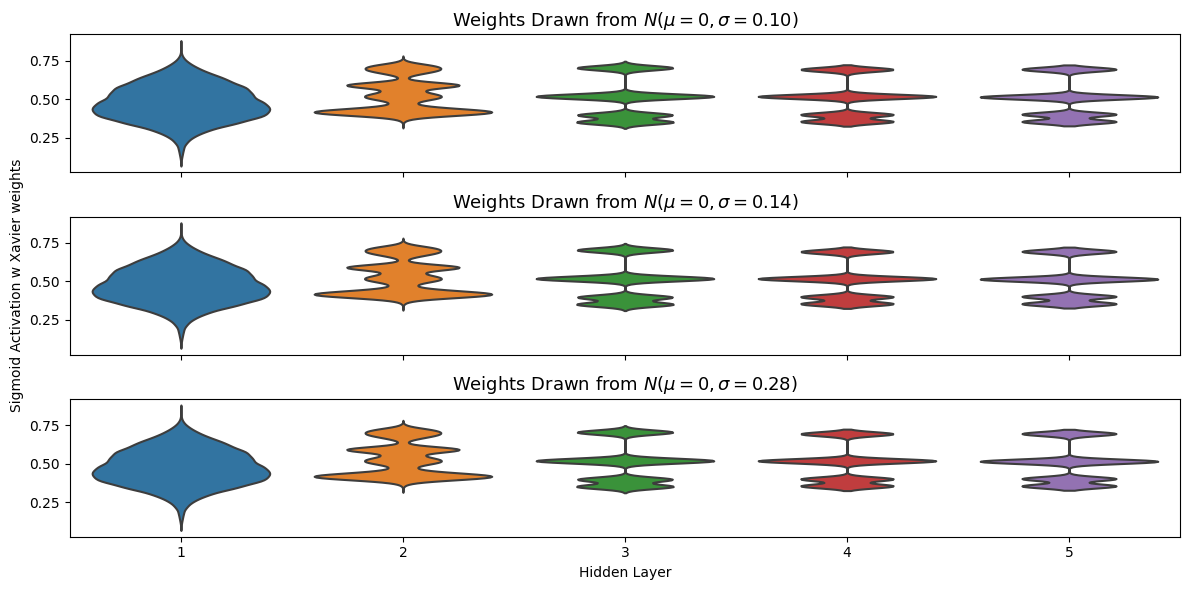

In [18]:
import keras
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from keras import initializers
from keras.datasets import mnist
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten
from keras import backend as K

from matplotlib import pyplot as plt
from matplotlib import rcParamsDefault

seed = 10

# Number of points to plot
n_train = 1000
n_test = 100
n_classes = 10

# Network params
n_hidden_layers = 5
dim_layer = 100
batch_size = n_train
epochs = 1

# Load and prepare MNIST dataset.
n_train = 60000
n_test = 10000

(x_train, y_train), (x_test, y_test) = mnist.load_data()
num_classes = len(np.unique(y_test))
data_dim = 28 * 28

x_train = x_train.reshape(60000, 784).astype('float32')[:n_train]
x_test = x_test.reshape(10000, 784).astype('float32')[:n_train]
x_train /= 255
x_test /= 255

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# Run the data through a few MLP models and save the activations from
# each layer into a Pandas DataFrame.
rows = []
sigmas = [0.10, 0.14, 0.28]
for stddev in sigmas:
    init = initializers.GlorotNormal(seed=seed)
    activation = 'sigmoid'
    input_shape = (data_dim,)
    bias_initializer  = 'zeros'
    kernel_initializer = init

    model = Sequential()
    model.add(Dense(dim_layer, input_shape=input_shape, kernel_initializer=kernel_initializer,
                    bias_initializer=bias_initializer))
    for i in range(n_hidden_layers):
        model.add(Dense(dim_layer, activation=activation, kernel_initializer=kernel_initializer,
                        bias_initializer=bias_initializer))
    model.add(Dense(n_classes, activation='softmax', kernel_initializer=kernel_initializer,
                    bias_initializer=bias_initializer))

    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=keras.optimizers.RMSprop(),
                  metrics=['accuracy'])


    outputs = [layer.output for layer in model.layers]
    activations = K.function([model.input], outputs)
    output_elts = activations([x_test])


    n_layers = len(model.layers)
    i_output_layer = n_layers - 1

    for i, out in enumerate(output_elts[:-1]):
        if i > 0 and i != i_output_layer:
            for out_i in out.ravel()[::20]:
                rows.append([i, stddev, out_i])

df = pd.DataFrame(rows, columns=['Hidden Layer', 'Standard Deviation', 'Output'])

# Plot previously saved activations from the 5 hidden layers
# using different initialization schemes.

fig = plt.figure(figsize=(12, 6))

n_rows = int(len(sigmas) / 1 + int(len(sigmas) % 1 > 0))

if not fig:
    default_figsize = rcParamsDefault['figure.figsize']
    fig = plt.figure(figsize=(
        default_figsize[0] * 1,
        default_figsize[1] * n_rows
    ))

axes = [plt.subplot(n_rows,1, i+1) for i in range(len(sigmas))]

for i, sig in enumerate(sigmas):
    ax = axes[i]
    ddf = df[df['Standard Deviation'] == sig]
    sns.violinplot(x='Hidden Layer', y='Output', data=ddf, ax=ax, scale='count', inner=None)

    ax.set_xlabel('')
    ax.set_ylabel('')

    ax.set_title('Weights Drawn from $N(\mu = 0, \sigma = {%.2f})$' % sig, fontsize=13)

    if sig == sigmas[1]:
        ax.set_ylabel("Sigmoid Activation w Xavier weights")
    if sig != sigmas[-1]:
        ax.set_xticklabels(())
    else:
        ax.set_xlabel("Hidden Layer")

plt.tight_layout()
plt.show()

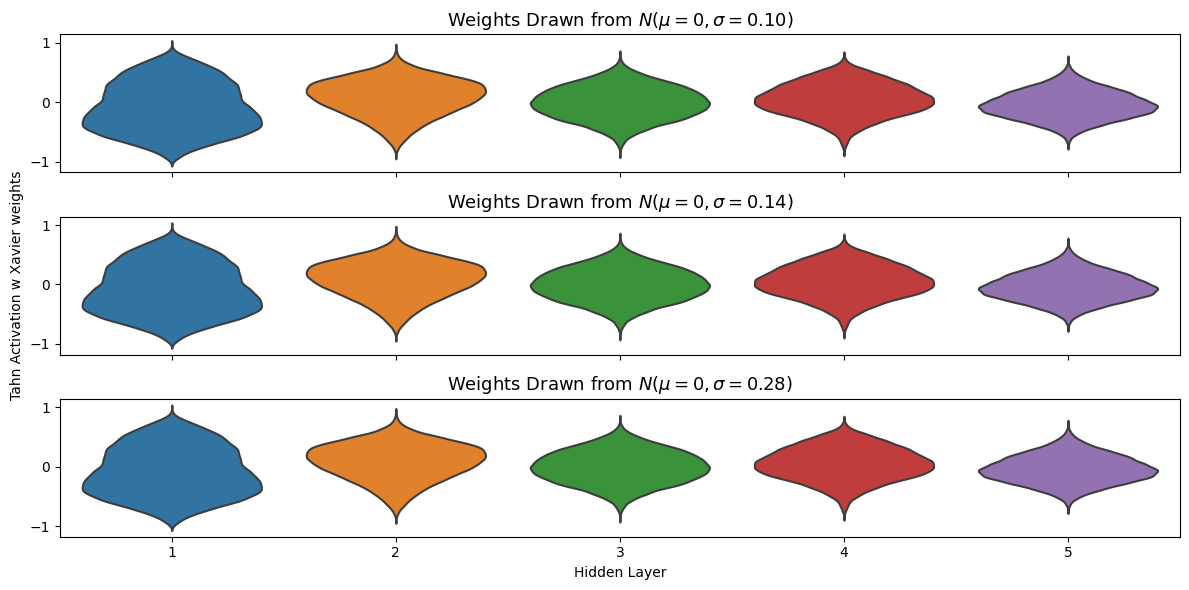

In [19]:
import keras
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from keras import initializers
from keras.datasets import mnist
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten
from keras import backend as K

from matplotlib import pyplot as plt
from matplotlib import rcParamsDefault

seed = 10

# Number of points to plot
n_train = 1000
n_test = 100
n_classes = 10

# Network params
n_hidden_layers = 5
dim_layer = 100
batch_size = n_train
epochs = 1

# Load and prepare MNIST dataset.
n_train = 60000
n_test = 10000

(x_train, y_train), (x_test, y_test) = mnist.load_data()
num_classes = len(np.unique(y_test))
data_dim = 28 * 28

x_train = x_train.reshape(60000, 784).astype('float32')[:n_train]
x_test = x_test.reshape(10000, 784).astype('float32')[:n_train]
x_train /= 255
x_test /= 255

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# Run the data through a few MLP models and save the activations from
# each layer into a Pandas DataFrame.
rows = []
sigmas = [0.10, 0.14, 0.28]
for stddev in sigmas:
    init = initializers.GlorotNormal(seed=seed)
    activation = 'tanh'
    input_shape = (data_dim,)
    bias_initializer  = 'zeros'
    kernel_initializer = init

    model = Sequential()
    model.add(Dense(dim_layer, input_shape=input_shape, kernel_initializer=kernel_initializer,
                    bias_initializer=bias_initializer))
    for i in range(n_hidden_layers):
        model.add(Dense(dim_layer, activation=activation, kernel_initializer=kernel_initializer,
                        bias_initializer=bias_initializer))
    model.add(Dense(n_classes, activation='softmax', kernel_initializer=kernel_initializer,
                    bias_initializer=bias_initializer))

    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=keras.optimizers.RMSprop(),
                  metrics=['accuracy'])


    outputs = [layer.output for layer in model.layers]
    activations = K.function([model.input], outputs)
    output_elts = activations([x_test])


    n_layers = len(model.layers)
    i_output_layer = n_layers - 1

    for i, out in enumerate(output_elts[:-1]):
        if i > 0 and i != i_output_layer:
            for out_i in out.ravel()[::20]:
                rows.append([i, stddev, out_i])

df = pd.DataFrame(rows, columns=['Hidden Layer', 'Standard Deviation', 'Output'])

# Plot previously saved activations from the 5 hidden layers
# using different initialization schemes.

fig = plt.figure(figsize=(12, 6))

n_rows = int(len(sigmas) / 1 + int(len(sigmas) % 1 > 0))

if not fig:
    default_figsize = rcParamsDefault['figure.figsize']
    fig = plt.figure(figsize=(
        default_figsize[0] * 1,
        default_figsize[1] * n_rows
    ))

axes = [plt.subplot(n_rows,1, i+1) for i in range(len(sigmas))]

for i, sig in enumerate(sigmas):
    ax = axes[i]
    ddf = df[df['Standard Deviation'] == sig]
    sns.violinplot(x='Hidden Layer', y='Output', data=ddf, ax=ax, scale='count', inner=None)

    ax.set_xlabel('')
    ax.set_ylabel('')

    ax.set_title('Weights Drawn from $N(\mu = 0, \sigma = {%.2f})$' % sig, fontsize=13)

    if sig == sigmas[1]:
        ax.set_ylabel("Tahn Activation w Xavier weights")
    if sig != sigmas[-1]:
        ax.set_xticklabels(())
    else:
        ax.set_xlabel("Hidden Layer")

plt.tight_layout()
plt.show()

**Answer:**

 For this activation function the magnitude of the plots decreases as the layers increase although, they still manage to stay relatively symmetical.

For the Xavier initalization, there is no change in the violin plots accross the three different standard deviations because xavier initalization has a normal distribution centered on zero and the distribution only depends on the input and out put and does not take into account the standard deviation.

The Xavier initlization created more consistent plots throughout the layers. There was a more drastic difference as the layer size increased without Xavier. Meaning that it is effective in combatting vanishing and exploding gradient issues, which is clearly seen in the stability of the plots as layer size increased as compared to the prevous plots.




## 3.3

In [2]:
import keras
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras import initializers
from matplotlib import rcParamsDefault

# Set random seed for reproducibility
seed = 10

# Number of points to plot
#n_train = 1000
#n_test = 100

# Network params
n_hidden_layers = 10
dim_layer = 2
batch_size = 64
epochs = 15
n_points = 3000

# Define the 1-dimensional function f2(x) = x * sin(5x)
def f2(x):
    return x * np.sin(5 * x)

# Generate training data
x_train = np.random.uniform(-np.sqrt(7), np.sqrt(7), size=(n_points, 1))
y_train = f2(x_train)

# Load test data (for plotting)
x_test = np.linspace(-np.sqrt(7), np.sqrt(7), n_points).reshape(-1, 1)
y_test = f2(x_test)

# Initialize lists to store layer-wise outputs
layer_outputs = [[] for i in range(n_hidden_layers)]

collapsed_count = 0
# Repeat training process 1000 times
num_simulations = 1000
for i in range(num_simulations):
    print (i) # to keep track
    # Build the neural network
    model = Sequential()
    model.add(Dense(dim_layer,activation='relu', input_shape=(1,) ))
    for _ in range(n_hidden_layers):
        model.add(Dense(dim_layer, activation='relu'))
    model.add(Dense(1))

    # Compile the model
    model.compile(optimizer='adam', loss='mean_squared_error')

    # Train the model
    model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1)

     # Check for network collapse by predicting on some test points
    test_points = np.linspace(-np.sqrt(7), np.sqrt(7), 100)
    predictions = model.predict(test_points)

    # Check if all predictions are approximately equal
    if np.allclose(predictions, predictions[0], atol=1e-2):
        collapsed_count += 1


Streaming output truncated to the last 5000 lines.
Epoch 13/15
47/47 [==============================] - 0s 3ms/step - loss: 1.0150
Epoch 14/15
47/47 [==============================] - 0s 3ms/step - loss: 1.0150
Epoch 15/15
4/4 [==============================] - 0s 3ms/step
844
Epoch 1/15
47/47 [==============================] - 2s 3ms/step - loss: 1.0325
Epoch 2/15
47/47 [==============================] - 0s 3ms/step - loss: 1.0252
Epoch 3/15
47/47 [==============================] - 0s 3ms/step - loss: 1.0209
Epoch 4/15
47/47 [==============================] - 0s 3ms/step - loss: 1.0182
Epoch 5/15
47/47 [==============================] - 0s 3ms/step - loss: 1.0168
Epoch 6/15
47/47 [==============================] - 0s 3ms/step - loss: 1.0160
Epoch 7/15
47/47 [==============================] - 0s 3ms/step - loss: 1.0154
Epoch 8/15
47/47 [==============================] - 0s 3ms/step - loss: 1.0152
Epoch 9/15
47/47 [==============================] - 0s 3ms/step - loss: 1.0152
Epoch 10/15

In [4]:
collapse_fraction = collapsed_count / num_simulations
print(f"Fraction of collapsed simulations: {collapse_fraction:.2f}")

Fraction of collapsed simulations: 0.97


As compared to the article which had a 91.9% collapse rate for sin(5x), my model had a 97% which is also above 90 and higher than the articles. This may be due to different model initations or the randomness of the model.

## 3.4

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LeakyReLU

# Set random seed for reproducibility
seed = 10

# Network params
n_hidden_layers = 10
dim_layer = 2
batch_size = 64
epochs = 15
n_points = 3000

# Define the 1-dimensional function f2(x) = x * sin(5x)
def f2(x):
    return x * np.sin(5 * x)

# Generate training data
x_train = np.random.uniform(-np.sqrt(7), np.sqrt(7), size=(n_points, 1))
y_train = f2(x_train)

# Load test data (for plotting)
x_test = np.linspace(-np.sqrt(7), np.sqrt(7), n_points).reshape(-1, 1)
y_test = f2(x_test)

# Initialize lists to store layer-wise outputs
layer_outputs = [[] for i in range(n_hidden_layers)]

collapsed_count = 0
# Repeat training process 1000 times
num_simulations = 1000
for i in range(num_simulations):
    print (i) # to keep track
    # Build the neural network
    model = Sequential()
    model.add(Dense(dim_layer, input_shape=(1,) ))
    model.add(LeakyReLU(alpha=0.01))
    for _ in range(n_hidden_layers):
        model.add(Dense(dim_layer))
        model.add(LeakyReLU(alpha=0.01))
    model.add(Dense(1))

    # Compile the model
    model.compile(optimizer='adam', loss='mean_squared_error')

    # Train the model
    model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1)

     # Check for network collapse by predicting on some test points
    test_points = np.linspace(-np.sqrt(7), np.sqrt(7), 100)
    predictions = model.predict(test_points)

    # Check if all predictions are approximately equal
    if np.allclose(predictions, predictions[0], atol=1e-2):
        collapsed_count += 1

Streaming output truncated to the last 5000 lines.
Epoch 13/15
47/47 [==============================] - 0s 4ms/step - loss: 1.0250
Epoch 14/15
47/47 [==============================] - 0s 4ms/step - loss: 1.0250
Epoch 15/15
4/4 [==============================] - 0s 3ms/step
844
Epoch 1/15
47/47 [==============================] - 2s 4ms/step - loss: 1.0414
Epoch 2/15
47/47 [==============================] - 0s 6ms/step - loss: 1.0340
Epoch 3/15
47/47 [==============================] - 0s 4ms/step - loss: 1.0298
Epoch 4/15
47/47 [==============================] - 0s 4ms/step - loss: 1.0274
Epoch 5/15
47/47 [==============================] - 0s 4ms/step - loss: 1.0262
Epoch 6/15
47/47 [==============================] - 0s 5ms/step - loss: 1.0256
Epoch 7/15
47/47 [==============================] - 0s 5ms/step - loss: 1.0253
Epoch 8/15
47/47 [==============================] - 0s 4ms/step - loss: 1.0251
Epoch 9/15
47/47 [==============================] - 0s 5ms/step - loss: 1.0251
Epoch 10/15

In [2]:
collapse_fraction = collapsed_count / num_simulations
print(f"Fraction of collapsed simulations: {collapse_fraction:.2f}")

Fraction of collapsed simulations: 0.76


**Answer:**

Yes leaky Relu did prevent dyign neurons. It droppped the collapsed neuron number from 97 to 76.  The leak was able to prevent neruors from dying because it didnt only output zero for negative inputs meanign they are less likely to get stuck so they can keep learning. The ability to adjudts gradients for the negative inputs makes sure that more neurons can stay alive and adjust their weights durign learning.